# Module 2, Practical 3

In this practical we will start working with algorithm complexity through practical examples.

## Complexity 

The *complexity* of an algorithm can be defined as a function mapping the size of the input to the time required to get the result. This is also called the *cost function*.

There exist several asymptotic (time-measuring) notations. Informally they are:

- Big Omega (best case)
- Big Theta (average case)
- Big O (worst case)

The upper-bound complexity *O* (the *big-Oh*) is generally the most interesting to analyze. In this practical we will work with this notation considering several Python code samples.

Big O is a formal notation that describes the behaviour of a function when the argument tends towards the maximum input. Big O takes the upper bound, that is, it considers the worst-case results, the worst execution of the algorithm. 

Instead of saying the input is 10 billion, or infinite, we say the input is ```n``` size. The exact size of the input doesn’t matter, we only care of how our algorithm performs with the worst input. This approach allows to still work with Big O even if we do not know the exact size of the input during the code execution.

Big O is easy to read once we learn the different order of growth:

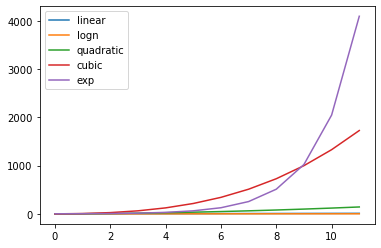

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

inputList = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

linear  = [n for n in inputList]
logn  = [math.log(n) for n in inputList]
quadratic  = [n*n for n in inputList]
cubic = [n*n*n for n in inputList]
exponential = [2**n for n in inputList]

functDict = {'linear': linear, "logn": logn, "quadratic": quadratic, "cubic": cubic, "exp": exponential}
functDf = pd.DataFrame(functDict) 
functDf.plot()
plt.show()
plt.close()

**Example 1**

Determine the complexity of these two functions:

In [2]:
def printList(inputList):
    for item in inputList:
        print(item)

printList([4, 5, 6, 8])

print("---------------------")

def printListBothDirections(inputList):
    print("Forward:")
    for item in inputList:
        print(item)
    print("Reverse:")
    for item in inputList[::-1]:
        print(item)

printListBothDirections([4, 5, 6, 8])


4
5
6
8
---------------------
Forward:
4
5
6
8
Reverse:
8
6
5
4


<div class="tggle" onclick="toggleVisibility('Example1');">Show/Hide Complexity</div>
<div id="Example1" style="display:none;">
Both ```printList``` and ```printListBothDirections``` are ```O(n)```, so their complexity is linear with respect to the processed list lenght.  
To be precise, ```printListBothDirections``` is ```O(n+n) = O(2n)```, but since we're looking towards infinite-size inputs, the double of infinite is still infinite.
</div>

**Example 2**

Determine the complexity of a function that computes the highest value for each pair of values from two input lists ```l1``` and ```l2```.

In [3]:
def computeHighest(l1, l2):
    for i1 in l1:
        for i2 in l2:
            if i1 > i2:
                print("Value {} in l1 greater than value {} in l2".format(i1, i2))     

computeHighest([4, 5, 6, 8], [12,1,42,11])

Value 4 in l1 greater than value 1 in l2
Value 5 in l1 greater than value 1 in l2
Value 6 in l1 greater than value 1 in l2
Value 8 in l1 greater than value 1 in l2


<div class="tggle" onclick="toggleVisibility('Example2');">Show/Hide Complexity</div>
<div id="Example2" style="display:none;">
The function is quadratic, ```O(n^2)```, as we do n iterations (one per each element in l1) times n iterations (one per each element in l2).
</div>

**Example 3**

Determine the complexity of the following functions, performing multiple tasks.

In [4]:
def myFunction(items):

    for i in reversed(range(1, 5)):
        print ("{} seconds left".format(i))
    print("boom!\n--------------")

    itemsString = ""
    for item in items:
        itemsString += ">{}".format(item)
    print(itemsString[1:])

    print("--------------")

    pairwiseProducts = []
    for item1 in items:
        for item2 in items:
            if (item1 == item2):
                print("I'm in the diagonal {} {}".format(item1, item2))
            pairwiseProducts.append(item1*item2)

myFunction([4, 5, 6, 8, 12, 14])    

4 seconds left
3 seconds left
2 seconds left
1 seconds left
boom!
--------------
4>5>6>8>12>14
--------------
I'm in the diagonal 4 4
I'm in the diagonal 5 5
I'm in the diagonal 6 6
I'm in the diagonal 8 8
I'm in the diagonal 12 12
I'm in the diagonal 14 14


<div class="tggle" onclick="toggleVisibility('Example3');">Show/Hide Complexity</div>
<div id="Example3" style="display:none;">
The complexity of this function can be determined by breaking it down in its different parts:

- the first loop does 4 iterations, regardless of the input. It is constant, so ```O(4)```.
- the second loop does n iterations, where n is the size of the input. It is linear, so ```O(n)```.
- the last loop does n*n iterations, where n is the size of the input. It is quadratic, so ```O(n^2)```.  

Therefore, by summing ```O(5) + O(n) + O(n^2)``` we can say that the function is ```O(n^2)```, which "dominates" the other terms.
</div>

**Example 4**

Determine the complexity of the  ```listHalver``` function that returns every division by 2 of the ```inputList``` parameter until it's empty, and the ```sliceStepper``` function that uses ```listHalver``` function with lists of length  ```n...1```. 

In [5]:
def listHalver(inputList):
    sliced = inputList
    while len(sliced) >= 2:
        sliced = sliced[:int(len(sliced)/2)]
        print(sliced)

listHalver([1, 2, 3, 4, 5, 6, 7, 8, 9])
print("------------")

def halverStepper(maxListLength):
    for step in reversed(range(1, maxListLength)):
        listHalver(list(range(1, step)))

halverStepper(12)

[1, 2, 3, 4]
[1, 2]
[1]
------------
[1, 2, 3, 4, 5]
[1, 2]
[1]
[1, 2, 3, 4]
[1, 2]
[1]
[1, 2, 3, 4]
[1, 2]
[1]
[1, 2, 3]
[1]
[1, 2, 3]
[1]
[1, 2]
[1]
[1, 2]
[1]
[1]
[1]


<div class="tggle" onclick="toggleVisibility('Example4');">Show/Hide Complexity</div>
<div id="Example4" style="display:none;">
The ```listHalver``` function needs to look at a smaller subset of the data at every step, and is therefore logarithmic, ```O(log(n))```.  
The ```halverStepper``` function does ```n``` times an ```O(log(n))``` operation (```listHalver```), and is therefore ```O(nlog(n))```.
</div>

## Exercises

1. Let ```M``` be a square matrix - a list containing ```n``` lists, each of them of size ```n```. Return the computational complexity of function ```fun()``` with respect to ```n```:



In [ ]:
def fun(M):
    for row in M:
        for element in row:
            print(sum([x for x in row if x != element]))

<div class="tggle" onclick="toggleVisibility('Ex1');">Show/Hide Complexity</div>
<div id="Ex1" style="display:none;">
```O(n^3)```, because the complexity is ```n``` for the list comprehension, times ```n``` for the inner ```for``` cycle, times ```n``` for the outer ```for``` cycle
</div>

2. Given a list ```L``` of ```n``` elements, please compute the asymptotic computational complexity of the following function, explaining your reasoning.

In [ ]:
def my_fun(L):
    n = len(L)
    tmp = []
    for i in range(int(n)):
        tmp.insert(0,L[i]-L[int(n/3)])
    return sum(tmp)

<div class="tggle" onclick="toggleVisibility('Ex2');">Show/Hide Complexity</div>
<div id="Ex2" style="display:none;">
It mainly depends on the implementation of the list (we will see in the following practicals what this means). One possbile answer could be:

- ```len(L)``` has a constant complexity ```O(1)```
- the for loop costs ```n``` times the head insertion in the list ```tmp```, if this requires a shift right of all the previously inserted elements, this could be in total ```O(n^2)```
- the final sum costs ```O(n)```

This makes a quadratic overall asymptotic complexity.
</div>

3. Given a sorted list ```alist``` of ```n``` elements, please compute the asymptotic computational complexity of the following function implementing binary search, explaining your reasoning.

In [ ]:
def binarySearch(alist, item):
    first = 0
    last = len(alist)-1
    found = False

    while first <= last and not found:
        midpoint = (first + last)//2
        if alist[midpoint] == item:
            found = True
        else:
            if item < alist[midpoint]:
            last = midpoint-1
            else:
                first = midpoint+1

    return found

<div class="tggle" onclick="toggleVisibility('Ex3');">Show/Hide Complexity</div>
<div id="Ex3" style="display:none;">
The binary search divides by two the lenght of the list at each iteration, this maks the asymptotic complexity to be ```0(log(n))```.
</div>

4. Please compute the asymptotic computational complexity of the following code, that computes the Fibonacci sequence according to the following formula:

- If ```n``` is even, then ```k = n/2``` and ```F(n) = [2*F(k-1) + F(k)]*F(k)```
- If ```n``` is odd, then ```k = (n + 1)/2``` and ```F(n) = F(k)*F(k) + F(k-1)*F(k-1)```.

In [ ]:
# Create an array of length n for memoization (we will see later what memoization is...)
n = 10
f = [0] * n
 
# Returns n'th fibonacci number using table f[]
def fib(n) :
    # Base cases
    if (n == 0) :
        return 0
    if (n == 1 or n == 2) :
        f[n] = 1
        return (f[n])
 
    # If fib(n) is already computed (thanks to memoization)
    if (f[n]):
        return f[n]
 
    # Applying above formula [Note value n&1 is 1
    # if n is odd, else 0.
    if((n & 1)):
        # (n & 1) is 1 when n is odd, 0 otherwise
        k = (n + 1) // 2
        f[n] = (fib(k) * fib(k) + fib(k-1) * fib(k-1))
    else :
        k = n // 2
        f[n] = (2*fib(k-1) + fib(k))*fib(k)
 
    return f[n]
 
 
# main code
for i in range(n):
    print(fib(i), end=' ') # avoids to add a new line at each iteration
print('') # to go to new line at the end

<div class="tggle" onclick="toggleVisibility('Ex4');">Show/Hide Complexity</div>
<div id="Ex4" style="display:none;">
Thanks to memoization, the access to the already computed Fibonacci numbers has constant complexity (```O(1)```). This makes the asymptotic complexity of the function ```fib``` to be logarithmic (```O(log (n))```). The function ```fib``` is then called ```n``` times. This makes the overall complexity to be ```O(n log(n))```.
</div>

5. Please compute the asymptotic computational complexity of the function ```subsets```, that computes all the subsets of a set of elements.

```
Subsets of {a,b}: {(), ('b',), ('a',), ('b', 'a')}
Subsets of {a,b,c}: {(), ('b',), ('a',), ('c',), ('b', 'a'), ('b', 'c'), ('a', 'c'), ('b', 'a', 'c')}
```

In [ ]:
from itertools import chain, combinations

def subsets(elementSet):
    return set(chain.from_iterable(combinations(elementSet, r) for r in range(len(elementSet)+1)))

print('Subsets of {a,b}:', subsets({'a','b'}))
print('Subsets of {a,b,c}:', subsets({'a','b','c'}))

<div class="tggle" onclick="toggleVisibility('Ex5');">Show/Hide Complexity</div>
<div id="Ex5" style="display:none;">
What’s important to notice here is that the number of subsets grows **exponentially** with the number ```n``` of the elements on the original set. This makes the overall complexity to be exponential ```O(2^n)```.
</div>